In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats as spicystats
import sys
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, roc_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from pandas.plotting import scatter_matrix
from statsmodels.stats.proportion import proportions_ztest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import f1_score, log_loss
from tabulate import tabulate

sys.path.insert(0, '../src')
sys.path.insert(0, '../data')

import chess

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
# Read in chess dataset and sample it. Drop columns containing immaterial data.

chess_df = chess.read_file('../data/games.csv')


{'Chess Outcomes Breakdown': resign       11147
mate          6325
outoftime     1680
draw           906
Name: victory_status, dtype: int64}


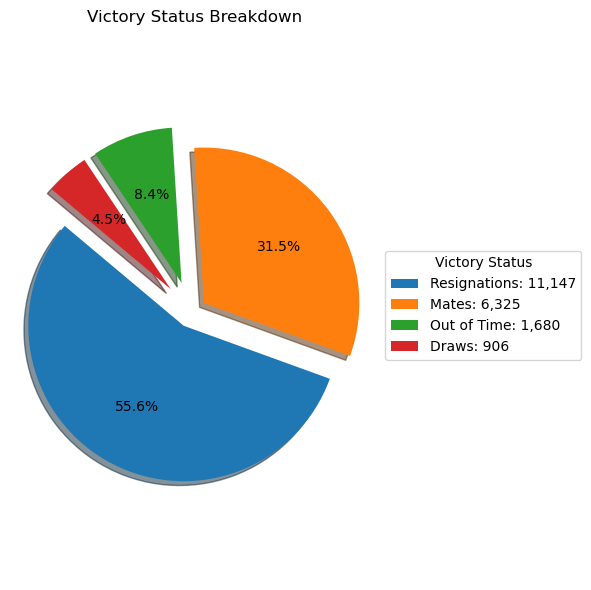

In [86]:
# Grab and count the chess victory status, broken down by category. Make pie chart to depict the delineations.
chess_outcomes_breakdown = chess.chess_victories(chess_df, path="../images/chess_outcomes_breakdown.png")


{'% of Victories': '95.48309901286271', '% of Draws': '4.516900987137302'}


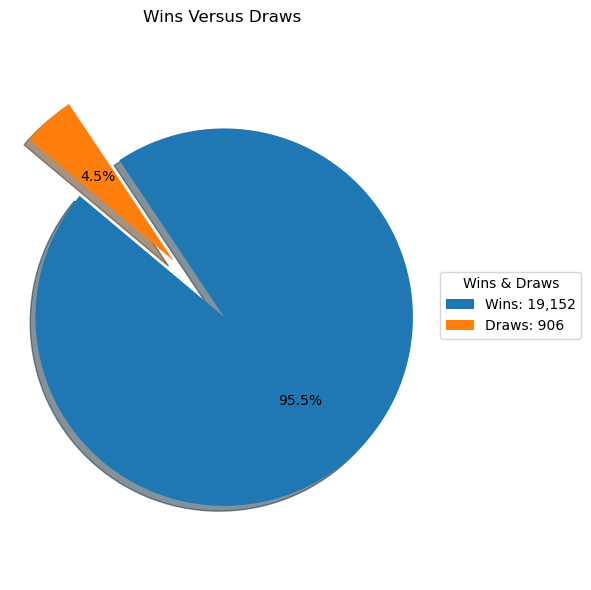

In [87]:
# Look at games won, by mate, out of time, and resignation, and compare to draws. Make pie charts for both delineations. 

wins_and_draws = chess.wins_versus_draws(chess_df, path="../images/wins_versus_draws.png")

In [88]:
# Null Hypothesis 1: The rating differential between black and white has no significance on which player wins the game.
# Alternative Hypothesis 1: The rating differential between black and white has a significance on which player wins the game.

In [89]:
# Null Hypothesis 2: The number of consecutive moves where a player follows an optimal book opening has no significance on which player wins the game.
# Alternative Hypothesis 2: The number of consecutive moves where a player follows an optimal book opening has a significance on which player wins the game.

In [90]:
# Null Hypothesis 3: The number of turns in a game has no significance on which player wins the game.
# Alternative Hypothesis 3: The number of turns in a game has significance on which player wins the game.

{'White t-test Rating Differential': Ttest_indResult(statistic=116.77245598751952, pvalue=0.0), 'White t-test Opening Play': Ttest_indResult(statistic=109.69620231061039, pvalue=0.0), 'White t-test # Turns': Ttest_indResult(statistic=129.08164547973476, pvalue=0.0)}
{'White Win Pct': 72.53794564066361, 'White Draw or Loss Pct': 27.462054359336392}


<Figure size 1200x700 with 0 Axes>

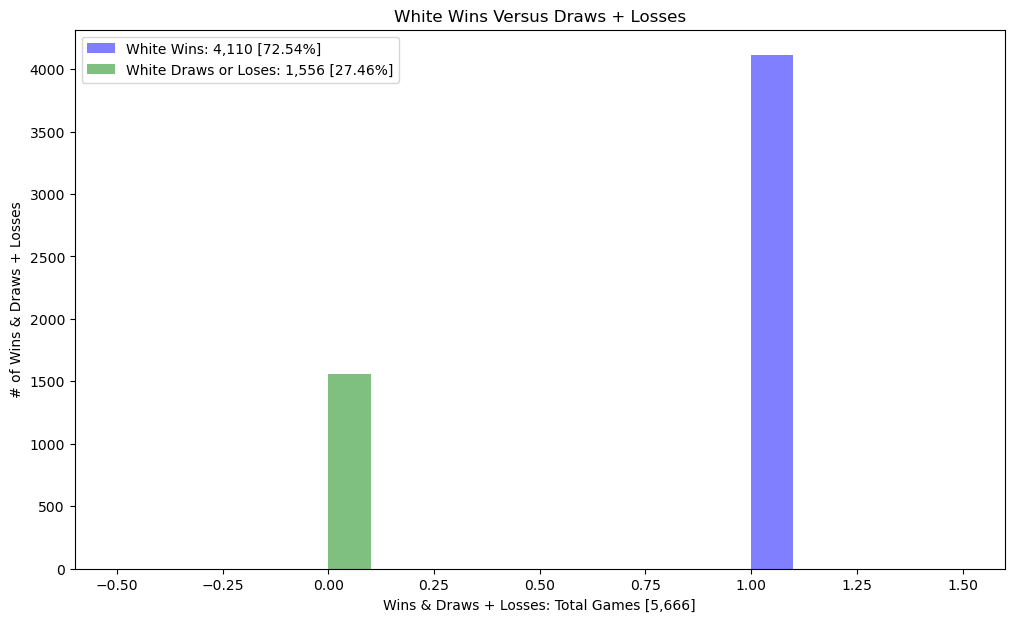

In [91]:
# Look at stronger white players, greater than 100 ELO difference, and map wins to 1 and draws or losses to 0.
# Perform two-sample independent t-tests to analyze the p-values and ultimately the null & alternative hypotheses for white rating differentials, 
# number of consecutive moves where a player follows an optimal book and number of turns in the game.
# Histogram plot displaying white wins versus white draws and losses when white is the superior opponent.

white_player_differentials = chess.chess_differentials_white(chess_df, path1='../images/white_t_tests.png', path2='../images/white_wins_vs_draws_&_losses.png')

# The p-value for rating differential, number of turns, and opening play is less than 0.05, with values of 0.00, so we reject all the null hypotheses and there is significant difference, or impact, 
# between: the white rating differentials, the consecutive moves used from an optimal book opening, the number of turns in the game, all in relation to who wins the game.
# Additionally, the high t-statistic of approximately 116.77, 109.70, and 129.08 for rating differentials, opening book play, and number of turns simply indicates the confidence in the predictor coefficient, since it's very large, and further supports the decision to reject the null hypothesis.  
# When only considering wins and draws plus losses of a higher-ranked white opponent, white wins 72.54% of the time and draws or loses 27.46% of the time over 5,666 games.

{'Black t-test Rating Differential': Ttest_indResult(statistic=114.47031390675558, pvalue=0.0), 'Black t-test Opening Play': Ttest_indResult(statistic=99.36160412461125, pvalue=0.0), 'Black t-test # Turns': Ttest_indResult(statistic=127.15415383110991, pvalue=0.0)}
{'White Win Pct': 69.27342256214149, 'White Draw or Loss Pct': 30.72657743785851}


<Figure size 1200x700 with 0 Axes>

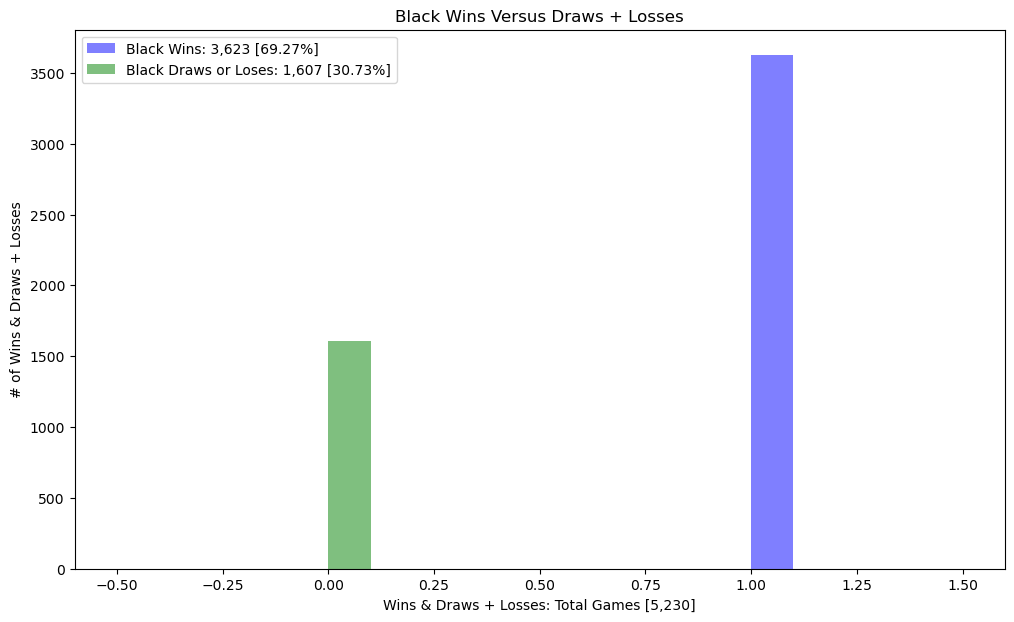

In [92]:
# Look at stronger black players, greater than 100 ELO difference, and map black wins to 1 and black draws or losses to 0.
# Perform two-sample independent t-tests to analyze the p-values and ultimately the null & alternative hypotheses for black rating differentials, 
# number of consecutive moves where a player follows an optimal book and number of turns in the game.
# Histogram plot displaying black wins versus black draws and losses when black is the superior opponent.

black_player_differentials = chess.chess_differentials_black(chess_df, path1='../images/black_t_tests.png', path2='../images/black_wins_vs_draws_&_losses.png')

# The p-value for rating differential, number of turns, and opening play is less than 0.05, with values of 0.00, so we reject all the null hypotheses and there is significant difference, or impact, 
# between: the black rating differentials, the consecutive moves used from an optimal book opening, the number of turns in the game, all in relation to who wins the game.
# Additionally, the high t-statistic of approximately 114.47, 99.36, and 127.15 for rating differentials, opening book play, and number of turns simply indicates the confidence in the predictor coefficient, since it's very large, and further supports the decision to reject the null hypothesis.
# When only considering wins and draws plus losses of a higher-ranked black opponent, black wins 69.27% of the time and draws or loses 30.73% of the time over 5,230 games.

{'White t-test Rating Differential': Ttest_indResult(statistic=116.77245598751952, pvalue=0.0), 'White t-test Opening Play': Ttest_indResult(statistic=109.69620231061039, pvalue=0.0), 'White t-test # Turns': Ttest_indResult(statistic=129.08164547973476, pvalue=0.0)}
{'White Win Pct': 72.53794564066361, 'White Draw or Loss Pct': 27.462054359336392}
{'Black t-test Rating Differential': Ttest_indResult(statistic=114.47031390675558, pvalue=0.0), 'Black t-test Opening Play': Ttest_indResult(statistic=99.36160412461125, pvalue=0.0), 'Black t-test # Turns': Ttest_indResult(statistic=127.15415383110991, pvalue=0.0)}
{'White Win Pct': 69.27342256214149, 'White Draw or Loss Pct': 30.72657743785851}
{'Pearson White Correlation': 0.1668308149961318, 'Pearson Black Correlation': 0.17783838499201052, 'Spearman White Correlation': 0.17851593325759896, 'Spearman Black Correlation': 0.1902427550086633}


<Figure size 1200x700 with 0 Axes>

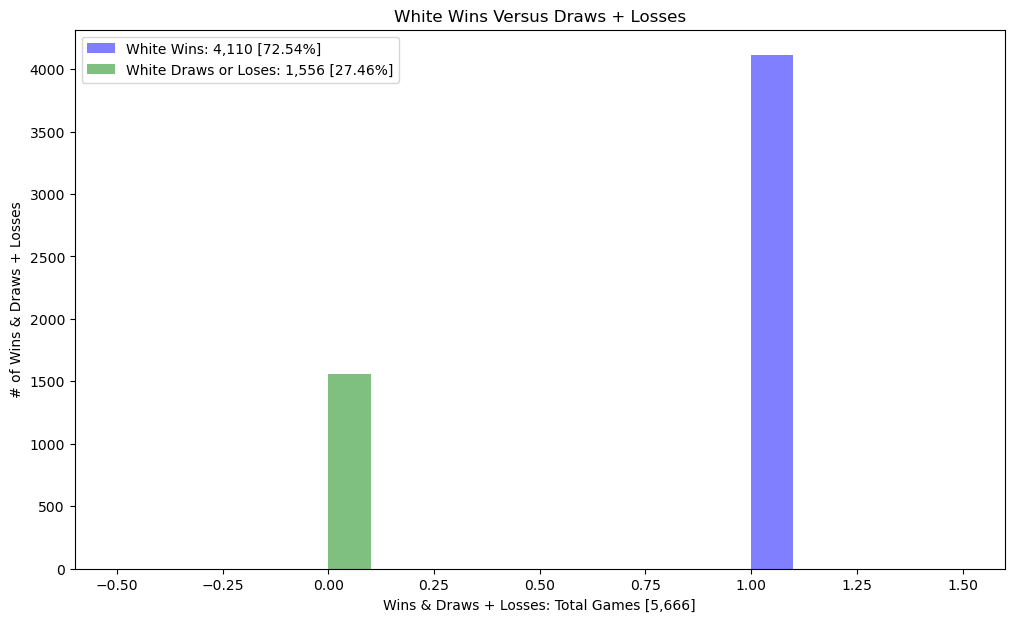

<Figure size 1200x700 with 0 Axes>

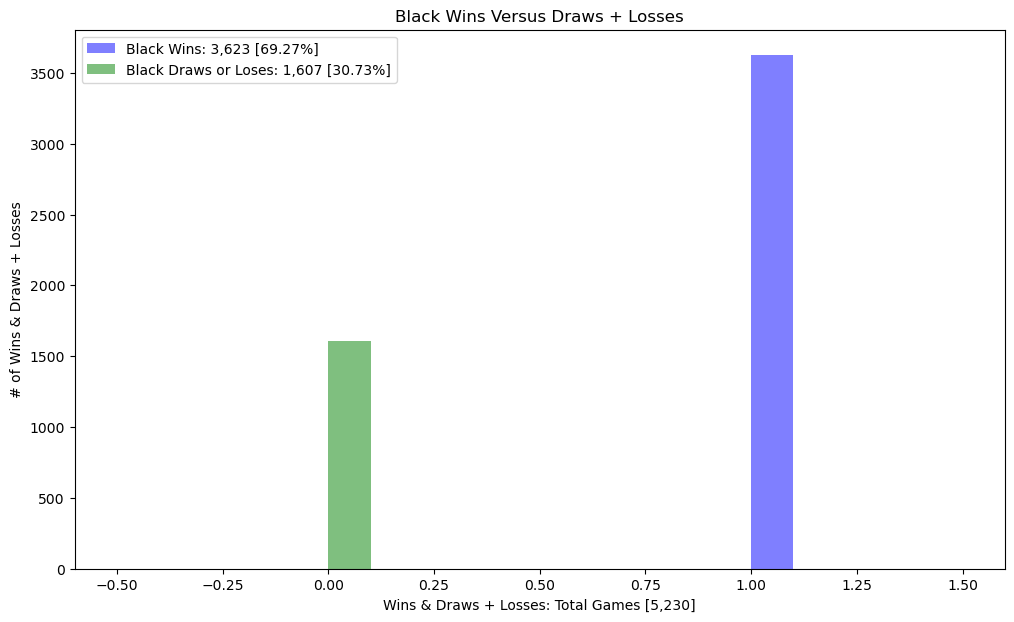

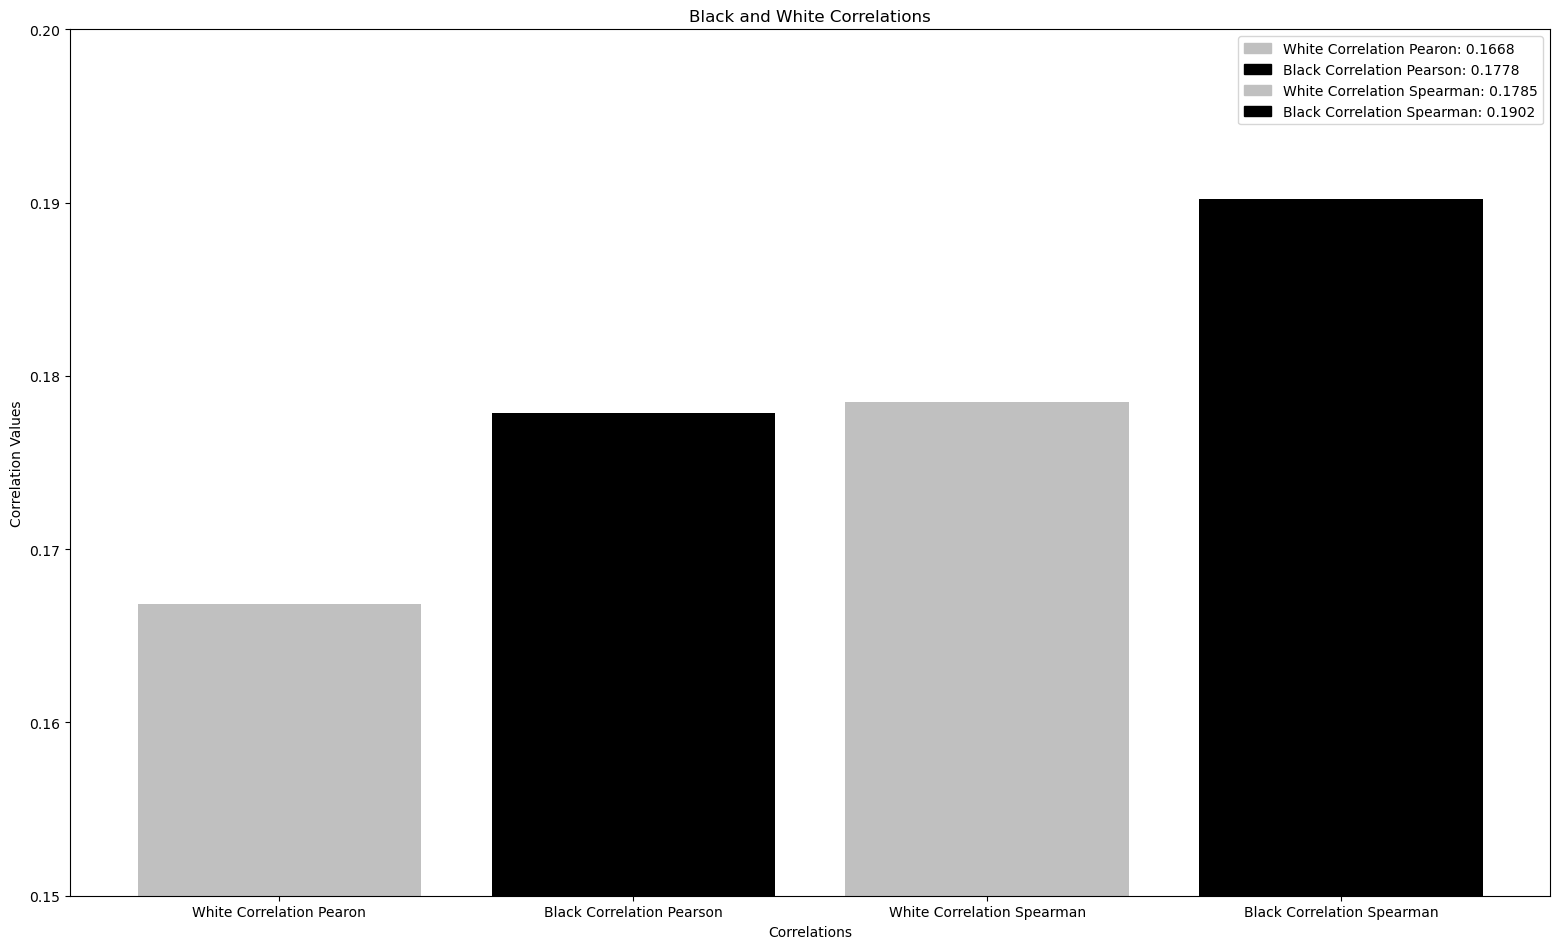

In [93]:
# Perform linear, Pearson correlations and nonlinear, Spearman correlation to see potential correlations between rating differentals, for white and black respectively, and their victory status.

all_correlations = chess.chess_correlations(chess.chess_differentials_white(chess_df, path1='../images/white_t_tests.png', path2='../images/white_wins_vs_draws_&_losses.png'), chess.chess_differentials_black(chess_df, path1='../images/black_t_tests.png', path2='../images/black_wins_vs_draws_&_losses.png'), path='../images/correlations.png')

# There is no true correlation between white or black being a significantly stronger opponent, in terms of ELO rating, 
# and winning games versus losing or drawing games, as seen from the linear, Pearson correlations and the nonlinear, Spearman correlations below.
# Shockingly, there is no true correlation between white or black being a significantly stronger opponent, in terms of ELO rating, and winning games versus losing or drawing games, 
# as seen from the linear, Pearson correlations and the nonlinear, Spearman correlations below. 
# Intuitively, one would think that over a continuous span of graudually increasing ELO differentials, there would be a correlation to the majority, binary class of 1, which is wins.

Optimization terminated successfully.
         Current function value: 0.570560
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 winner   No. Observations:                 4532
Model:                          Logit   Df Residuals:                     4529
Method:                           MLE   Df Model:                            2
Date:                Mon, 06 Feb 2023   Pseudo R-squ.:                 0.02948
Time:                        06:47:55   Log-Likelihood:                -2585.8
converged:                       True   LL-Null:                       -2664.3
Covariance Type:            nonrobust   LLR p-value:                 7.765e-35
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
turns                        -0.0037      0.001     -4.453      0.000      -0.

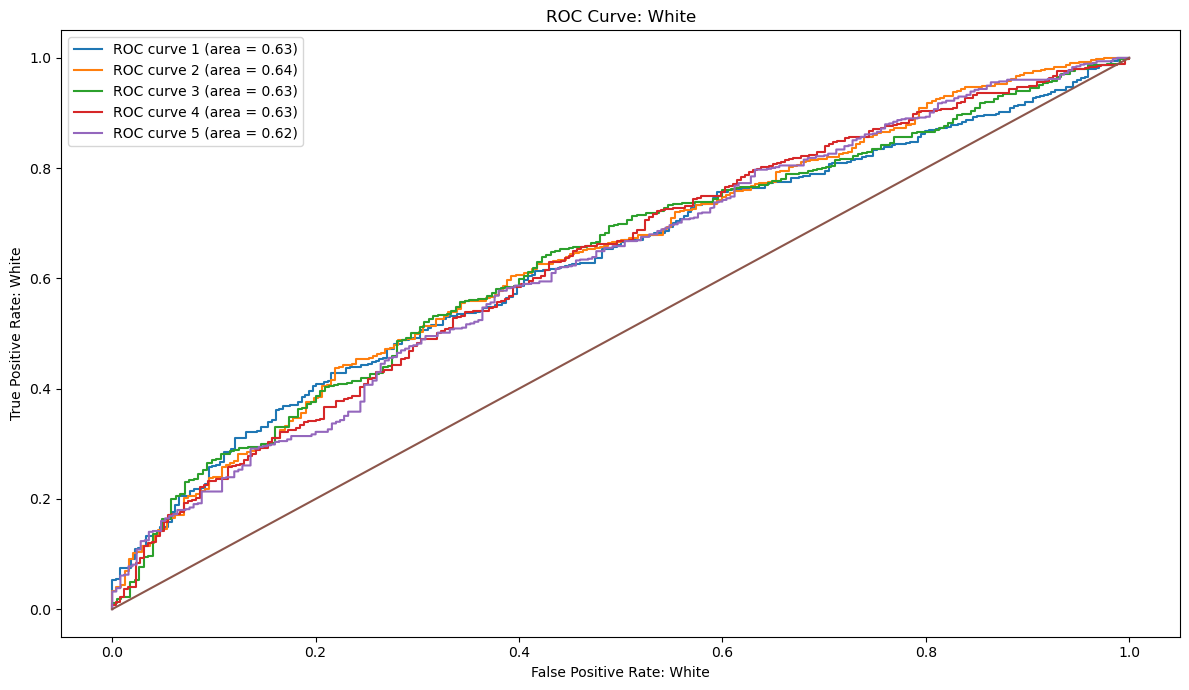

In [94]:
# Since we have continuous numerical inputs, or features, in the form of: rating differentials, consecutive moves where a player follows an optimal book opening, and number of turns in the game 
# along with a transformation of the target, or wins versus draws and losses, to binary values, we ran a logistic regression model. 
# The logistic regression for both white and black utilized 5 folds, or subsets, with an 80% split of the samples into the training set and the remaining 20% of the data was held out for the test set. 
# We determined the true positive rate, or probability of detection, as a function of false positive rate, or probability of false alarm, and generated a Receiver Operating Characteristic (ROC) curves for all 5 folds. 
# Additionally, we generated the Area Under the Curve (AUC) for our ROC curves to determine the model's predictive accuracy and found that for all 5 folds, 
# for both black and white, the AUC was bound between 0.61 and 0.64, which is indicative of poor predictive accuarcy for our model as 1.0 would be a perfect prediction. 
# We believe that the model's predictive accuracy would increase if additional quantitative features were provided in the dataset that factor into winning a chess game versus losing or drawing. 
# Some, but not all, of the excluded features are: hours of individual study/preparation, hours of analysis of the opponent's playstyle and openings selection, hours of sleep preceding the game, number of times the opponents have previously faced each other.
# Also, across all 5 folds, the average accuracy, precision, recall, F1 Score, log loss, and log loss probability were determined for white and black.
# Finally, an additional logistic regression model was ran to mainly analyze the p-values, or significance, of the features for both white and black games.

white_log_reg = chess.test_train_white(chess_df, path1='../images/roc_curve_white.png', path2='../images/stats_model_white.png')

# The average accuracy and average precision across all 5 folds for white are both respectable and nearly the same with the average accuracy being approximately 72.42% and the average precision being approximately 72.70%.
# Accuracy is a function of true positives, true negatives, false positives, or probability of false alarms, and false negatives, or probability of incorrectly identifying that an attribute is absent.
# We can ascertain that our logistic regression model is being reduced due to the reasonable amount of false positives that are present and is supported by our precision also being reduced due to the same false positive generation.
# Precision is a function of true positives, or probability of detection, and false positives, which is the probability of a false alarm. 
# We can ascertain that our logistic regression model has a reasonable amount of false positives, or incorrectly predicting the positive class of 1, when it should be predicting the negative class of 0, hence false positives are generated. 
# The average recall across all 5 folds for white was excellent with a result of approximately 99.24%.
# Recall is a function of true positives, or probability of detection, and false negatives, which is the probability of incorrectly identifying that an attribute is absent.
# We can ascertain that our logistic regression model has very few false negatives, which would be missing the ability to successsfully predict the correct, positive class of 1 and instead predicting a negative class of 0.
# The average F1 Score across all 5 folds for white was very good with a result of approximately 83.91%.
# The average F1 score is a function of the average precision and average recall. 
# The relatively good mean precision of 72.70% and stellar mean recall of 99.24% is yielding the great F1 score of approximately 83.91%.
# The average log loss across all 5 folds for white was only average with a result of approximately 0.5660, where 0 is optimal. 
# The associated average probability of the log loss across all 5 folds for white was determined to be approximately 0.5696, which effectively denotes the probability of the logistic regression model predicting the proper class, 0 for draws & losses, and 1 for wins, respectively.
# The mediocre result for average log loss and average log loss probability could be due to an imbalanced dataset that truly contains significantly more wins, or binary values of 1, in comparsion to draws & losses, or binary values of 0.

Optimization terminated successfully.
         Current function value: 0.598554
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 winner   No. Observations:                 4184
Model:                          Logit   Df Residuals:                     4181
Method:                           MLE   Df Model:                            2
Date:                Mon, 06 Feb 2023   Pseudo R-squ.:                 0.02985
Time:                        06:47:57   Log-Likelihood:                -2504.3
converged:                       True   LL-Null:                       -2581.4
Covariance Type:            nonrobust   LLR p-value:                 3.391e-34
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
turns                        -0.0010      0.001     -1.212      0.225      -0.

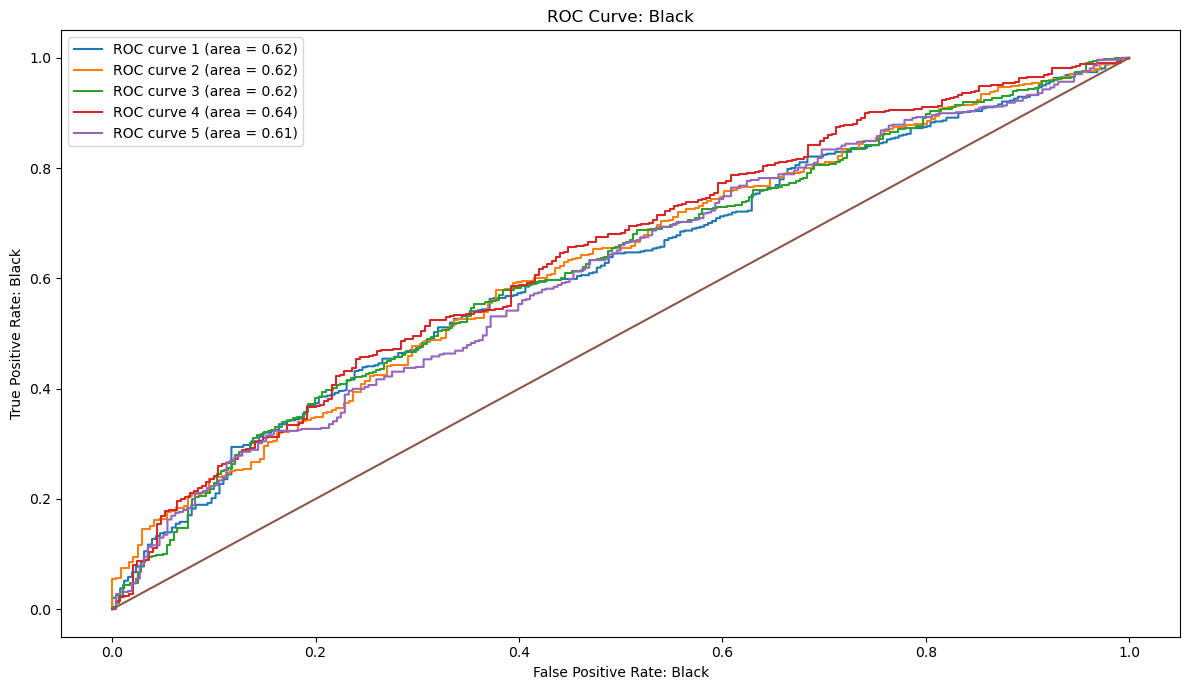

In [95]:
# Defer to paragraph in top of previous cell for explanation.

black_log_reg = chess.test_train_black(chess_df, path1='../images/roc_curve_black.png', path2='../images/stats_model_black.png')

# The average accuracy and average precision across all 5 folds for black are both respectable and nearly the same with the average accuracy being approximately 69.38% and the average precision being approximately 69.39%.
# Accuracy is a function of true positives, true negatives, false positives, or probability of false alarms, and false negatives, or probability of incorrectly identifying that an attribute is absent.
# We can ascertain that our logistic regression model is being reduced due to the reasonable amount of false positives that are present and is supported by our precision also being reduced due to the same false positive generation.
# Precision is a function of true positives, or probability of detection, and false positives, which is the probability of a false alarm. 
# We can ascertain that our logistic regression model has a reasonable amount of false positives, or incorrectly predicting the positive class of 1, when it should be predicting the negative class of 0, hence false positives are generated. 
# The average recall across all 5 folds for black was excellent with a result of approximately 99.83%.
# Recall is a function of true positives, or probability of detection, and false negatives, which is the probability of incorrectly identifying that an attribute is absent.
# We can ascertain that our logistic regression model has very few false negatives, which would be missing the ability to successsfully predict the correct, positive class of 1 and instead predicting a negative class of 0.
# The average F1 Score across all 5 folds for black was very good with a result of approximately 81.86%.
# The average F1 score is a function of the average precision and average recall. 
# The relatively good mean precision of 69.39% and stellar mean recall of 99.83% is yielding the great F1 score of approximately 81.86%.
# The average log loss across all 5 folds for black was only average with a result of approximately 0.5969, where 0 is optimal. 
# The associated average probability of the log loss across all 5 folds for black was determined to be approximately 0.5162, which effectively denotes the probability of the logistic regression model predicting the proper class, 0 for draws & losses, and 1 for wins, respectively.
# The mediocre result for average log loss and average log loss probability could be due to an imbalanced dataset that truly contains significantly more wins, or binary values of 1, in comparsion to draws & losses, or binary values of 0.

In [96]:
# Conclusion
# When comparing filtered games where white is the superior opponent with black being the superior opponent, the total games in each respective database very similar with comparable wins versus draws and losses. 
# When running one version of a logistic regression model for both white and black games, we see very similar average metrics for the accuracy, precision, recall, F1 score, log loss, and log loss probability. 
# However, when utilizing a different logistic regression statistical model, a worthwhile not is looking at the respective inputs, or features, for our white and black chess games, respectively. 
# The three features utilized for both black and white games were rating differential, number of turns in the game, and opening play, which is the consecutive moves from the initiation of the game that opponents stick to an optimal, book opening. 
# In general, typically skilled players, even with reasonable rating differentials, will have games with a substantial amount of moves because they avoid suboptimal moves and outright blunders.
# More specifically, with the white games, our three features all had p-values of 0.000, which are significant since they are less than 0.05, and thus are a good choice to be incorporated into predicting our target, or binary output of wins versus draws and losses.
# Regarding the black games, the rating differential feature was determined to be significant at 0.000, but interestingly enough the number of terms and opening play were didn't yeild significant p-values, or greater than 0.05, at 0.225 and 0.372, respectively.
# There has been extensive, cumulative analysis on chess throughout the years to determine that white has an innate advantage simply by being the first player to make a move.
# The respective difference in significances of our features between white and black games might indicate the fact that due to the inherent disadvantage of black being the responsive player, there is no significance on the number of moves and sticking to an optimal book opening. 
# Essentially, the disadvantage of moving second might trump the ability to follow optimal book openings and play in technically sound games that contain a large number of moves.